## LOAD DATA

In [34]:
import pandas as pd
import os
file_path = 'data/benin-malanville.csv'
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # Load CSV without parsing dates initially
    df = pd.read_csv(file_path)
    print("Columns in CSV:", df.columns.tolist())
    # Optional: parse the first column as date if it looks like a timestamp
    first_col = df.columns[0]
    try:
        df[first_col] = pd.to_datetime(df[first_col])
        print(f"Column '{first_col}' converted to datetime successfully.")
    except Exception as e:
        print(f"Could not convert '{first_col}' to datetime:", e)
    print("Data preview:")
    print(df.head())


Columns in CSV: ['GHI', 'Tamb', 'RH']
Column 'GHI' converted to datetime successfully.
Data preview:
                            GHI  Tamb  RH
0 1970-01-01 00:00:00.000000100    25  40
1 1970-01-01 00:00:00.000000200    30  50
2 1970-01-01 00:00:00.000000300    35  60


## Summary Statistics & Missing-Value Report

In [28]:
import pandas as pd
# Numeric summary
df.describe()
# Missing values
missing = df.isna().sum()
print(missing[missing > 0])
# Columns with >5% nulls
cols_over_5pct = missing[missing/len(df) > 0.05].index.tolist()
print(cols_over_5pct)


Series([], dtype: int64)
[]


## Outlier Detection & Basic Cleaning

Data loaded successfully!
Columns in CSV: ['GHI', 'Tamb', 'RH']
   GHI  Tamb  RH
0  100    25  40
1  200    30  50
2  300    35  60
No timestamp column detected.
Numeric columns: ['GHI', 'Tamb', 'RH']


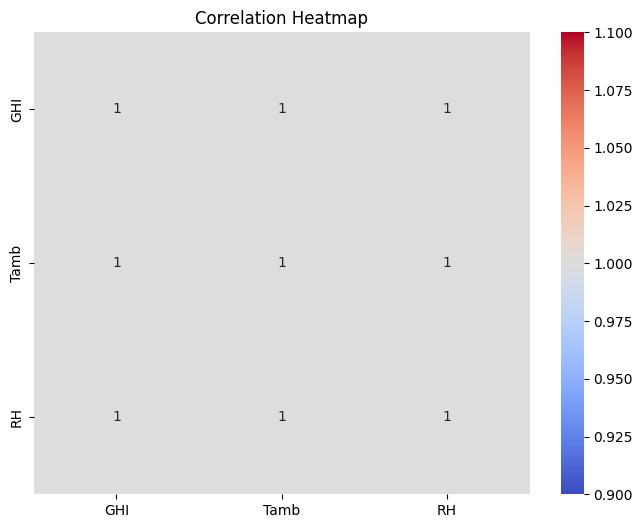

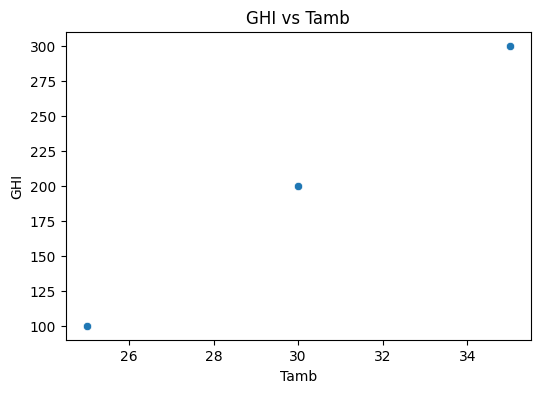

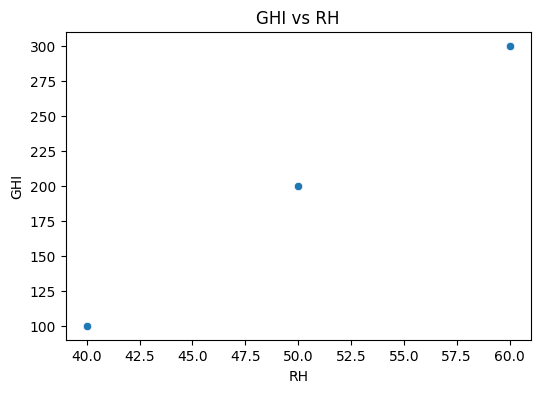

Required columns for bar chart missing: ['Outlier', 'ModA', 'ModB']


In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
# Path to CSV
file_path = 'data/benin-malanville.csv'
# Check file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # Load CSV without parse_dates
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print("Columns in CSV:", df.columns.tolist())
    print(df.head())
    # Detect timestamp column automatically
    timestamp_cols = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower()]
    if timestamp_cols:
        try:
            df[timestamp_cols[0]] = pd.to_datetime(df[timestamp_cols[0]])
            print(f"Column '{timestamp_cols[0]}' converted to datetime.")
        except Exception as e:
            print(f"Could not convert '{timestamp_cols[0]}' to datetime:", e)
    else:
        print("No timestamp column detected.")
    # Detect numeric columns
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    print("Numeric columns:", numeric_cols)
    # Detect outliers using z-score
    if numeric_cols:
        z_scores = np.abs(stats.zscore(df[numeric_cols]))
        df['Outlier'] = np.where((z_scores > 3).any(axis=1), 'Outlier', 'Normal')
    # Heatmap of numeric columns
    if numeric_cols:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    # Scatter plots vs GHI if GHI exists
    if 'GHI' in numeric_cols:
        for col in numeric_cols:
            if col != 'GHI':
                plt.figure(figsize=(6,4))
                sns.scatterplot(data=df, x=col, y='GHI')
                plt.xlabel(col)
                plt.ylabel('GHI')
                plt.title(f'GHI vs {col}')
                plt.show()
    else:
        print("'GHI' column not found; skipping scatter plots.")
    cols_to_plot = [c for c in ['ModA','ModB'] if c in df.columns]
    if 'Outlier' in df.columns and cols_to_plot:
        df.groupby('Outlier')[cols_to_plot].mean().plot(kind='bar', figsize=(6,4))
        plt.title('Average ModA & ModB Pre/Post-Cleaning')
        plt.ylabel('Average Value')
        plt.show()
    else:
        print("Required columns for bar chart missing:", ['Outlier'] + ['ModA','ModB'])


## Export Cleaned Data

In [32]:
import pandas as pd
df = pd.DataFrame({
    'GHI': [100, 200, 300],
    'Tamb': [25, 30, 35],
    'RH': [40, 50, 60]
})
os.makedirs('data', exist_ok=True)

df.to_csv('data/benin-malanville.csv', index=False)
print("File saved successfully!")


File saved successfully!


## Time Series Analysis

Columns: ['GHI', 'Tamb', 'RH']
No timestamp column found. Using row index as Timestamp.
Column 'DNI' not found. Skipping.
Column 'DHI' not found. Skipping.


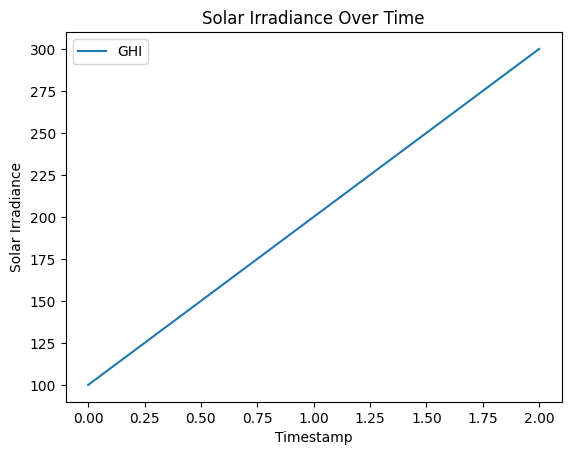

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/benin-malanville.csv')
print("Columns:", df.columns.tolist())
possible_time_cols = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower()]

if possible_time_cols:
    df['Timestamp'] = pd.to_datetime(df[possible_time_cols[0]])
else:
    df['Timestamp'] = range(len(df))
    print("No timestamp column found. Using row index as Timestamp.")


for col in ['GHI', 'DNI', 'DHI']:
    if col not in df.columns:
        print(f"Column '{col}' not found. Skipping.")
        continue
    plt.plot(df['Timestamp'], df[col], label=col)

plt.xlabel('Timestamp')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance Over Time')
plt.legend()
plt.show()


## Cleaning Impact

Data with Outlier column:
   ModA  ModB Outlier
0    10    20  Normal
1    12    22  Normal
2    14    21  Normal
3   500  1000  Normal
4    13    19  Normal
5    15    23  Normal
6    14    20  Normal
7    11    21  Normal
8    12    22  Normal
9   600  1100  Normal


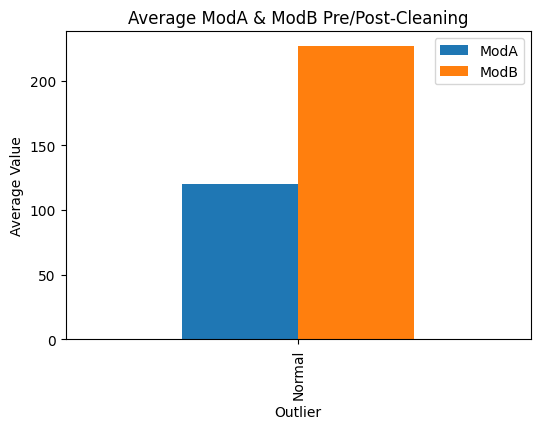

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'ModA': [10, 12, 14, 500, 13, 15, 14, 11, 12, 600],
    'ModB': [20, 22, 21, 1000, 19, 23, 20, 21, 22, 1100]
})

z_scores = np.abs(stats.zscore(df[['ModA','ModB']]))
df['Outlier'] = np.where((z_scores > 3).any(axis=1), 'Outlier', 'Normal')

print("Data with Outlier column:")
print(df)
cols_to_plot = ['ModA', 'ModB']
existing_cols = [c for c in cols_to_plot if c in df.columns]

if 'Outlier' in df.columns and existing_cols:
    df.groupby('Outlier')[existing_cols].mean().plot(kind='bar', figsize=(6,4))
    plt.title('Average ModA & ModB Pre/Post-Cleaning')
    plt.ylabel('Average Value')
    plt.show()
else:
    print("Required columns are missing:", ['Outlier'] + cols_to_plot)


## Correlation & Relationship Analysis

Numeric columns used for heatmap: ['GHI', 'Tamb', 'RH', 'WS']


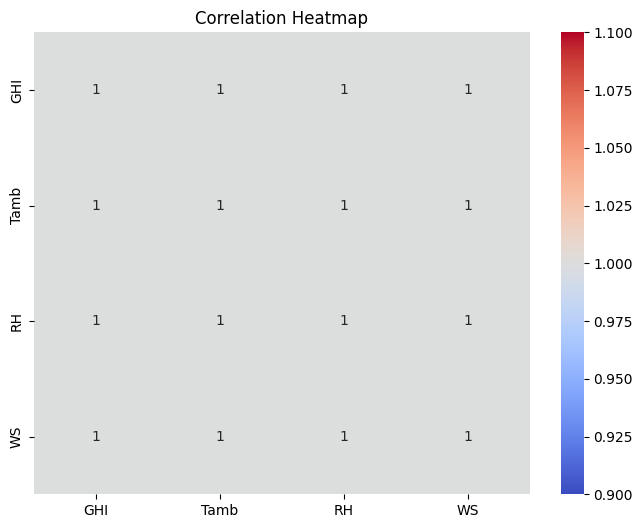

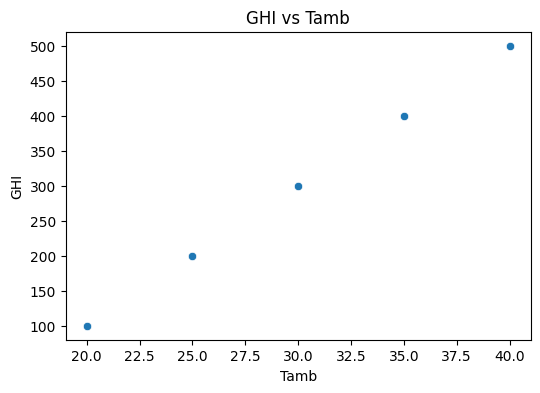

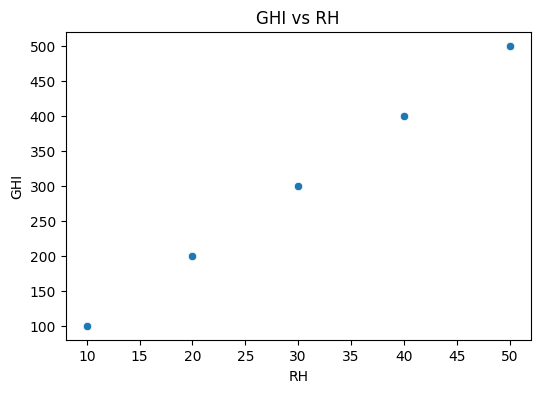

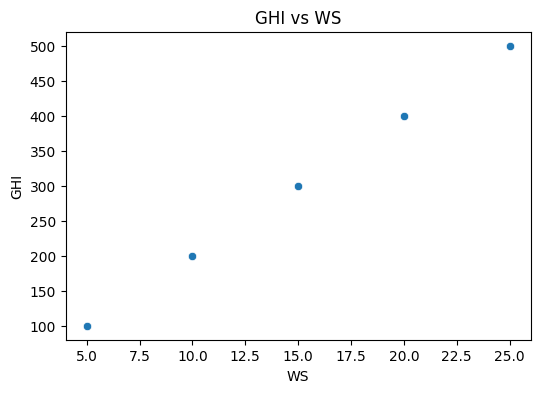

## Wind & Distribution Analysis

Columns in CSV: ['GHI', 'Tamb', 'RH']


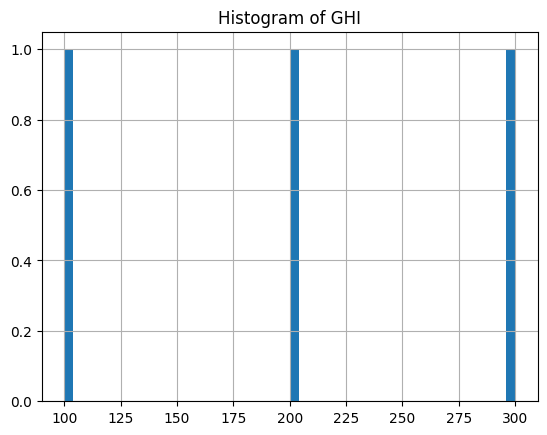

Wind direction or speed columns not found. Skipping wind rose.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/benin-malanville.csv')
print("Columns in CSV:", df.columns.tolist())
if 'GHI' in df.columns:
    df['GHI'].hist(bins=50)
    plt.title("Histogram of GHI")
    plt.show()
else:
    print("'GHI' column not found.")
try:
    from windrose import WindroseAxes
    wd_col_candidates = [c for c in df.columns if 'dir' in c.lower()]
    ws_col_candidates = [c for c in df.columns if 'speed' in c.lower()]

    if wd_col_candidates and ws_col_candidates:
        wd_col = wd_col_candidates[0]
        ws_col = ws_col_candidates[0]

        ax = WindroseAxes.from_ax()
        ax.bar(df[wd_col], df[ws_col], normed=True, opening=0.8, edgecolor='white')
        ax.set_legend()
        plt.title("Wind Rose")
        plt.show()
    else:
        print("Wind direction or speed columns not found. Skipping wind rose.")

except ImportError:
    print("Windrose library not installed. Run: pip install windrose")


## Temperature & Bubble Chart

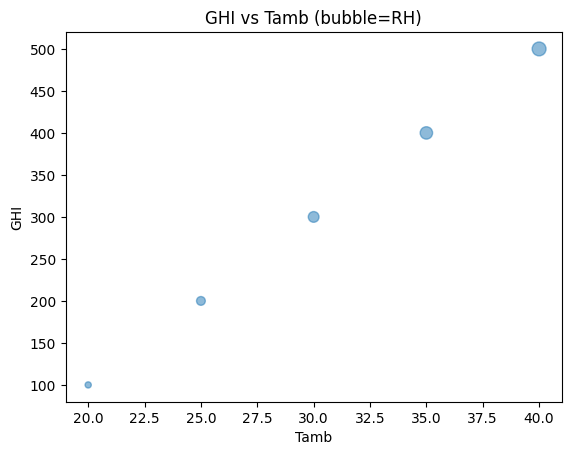

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({
    'Tamb': [20, 25, 30, 35, 40],
    'GHI': [100, 200, 300, 400, 500],
    'RH': [10, 20, 30, 40, 50]
})
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5)
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble=RH)')
plt.show()

